In [ ]:
import pandas
import numpy

# Independencia de variables aleatorias
1. Genere la ley de probabilidad de las siguientes variables aleatorias:

  - El número que puede salir en la [ruleta francesa](https://es.wikipedia.org/wiki/Ruleta#/media/Archivo:Roulette_frz.png) (sólo tienen un cero)
  - El color que puede salir en la ruleta francesa

2. Evalue si los siguientes eventos son dependientes o independientes
  - A : obtener un numero impar,
  - B : que sea color negro,

3. Calcule la probabilidad condicional de obtener un número impar dado que salió el color negro P(A|B)

4. Calcule la probabilidad condicional de que el número sea negro, dado que salio un impar P(A|B)



## Solucion

### Independencia de variables aleatorias
1. Genere la ley de probabilidad de las siguientes variables aleatorias:

  - El número que puede salir en la [ruleta francesa](https://es.wikipedia.org/wiki/Ruleta#/media/Archivo:Roulette_frz.png) (sólo tienen un cero)
  - El color que puede salir en la ruleta francesa

In [ ]:
nfrech_roulette = set(list(range(0, 37)))

red = ((range(1,10,2)),
       (range(12,19,2)),
       (range(19,28,2)),
       (range(30,37,2)))

red = set([nl for r in red for nl in list(r)])

black = set(nfrech_roulette) - set(red)

display("red", red)
display("black", black)

'red'

{1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}

'black'

{0, 2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35}

2. Evalue si los siguientes eventos son dependientes o independientes

    - A : obtener un numero impar,
    - B : que sea color negro,



In [ ]:
roulette = pandas.DataFrame({ 'number': list(nfrech_roulette), 'color': numpy.nan, 'prob': 1/37 })

roulette.loc[red, 'color'] = 'red'
roulette.loc[black, 'color'] = 'black'
roulette.loc[0, 'color'] = 'green'

roulette.set_index('number')
display(roulette)

,number,color,prob
0,0,green,0.027027
1,1,red,0.027027
2,2,black,0.027027
3,3,red,0.027027
4,4,black,0.027027
5,5,red,0.027027
6,6,black,0.027027
7,7,red,0.027027
8,8,black,0.027027
9,9,red,0.027027


In [ ]:
A = roulette['number'].isin(range(2, 37, 2))
B = roulette['color'] == 'black'

In [ ]:
# Probabilidad P(B|A)

p_A = roulette[A]['prob'].sum()
p_B = roulette[A]['prob'].sum()
p_AnB = roulette[A & B]['prob'].sum()

display('A : obtener un numero impar', p_A, 'B : que sea color negro', p_B)

'A : obtener un numero impar'

0.4864864864864865

'B : que sea color negro'

0.4864864864864865

In [ ]:
def test_independecy(pA, pB, p_AnB):
  return round(pA*pB, 2) == round(p_AnB, 2)

In [ ]:
display('Independiente?', test_independecy(p_A, p_B, p_AnB))

'Independiente?'

False

In [ ]:
def probabilidad_condicional(pA, pB, pAnB):
  pA_B = round(pAnB / pB, 2)
  pB_A = round(pAnB / pA, 2)
  print('P(A):', round(pA,2))
  print('P(B):', round(pB,2))
  print('P(A|B):', pA_B)
  print('P(B|A):', pB_A)
  return pA_B, pB_A

3. Calcule la probabilidad condicional de obtener un número impar dado que salió el color negro P(A|B)

4. Calcule la probabilidad condicional de que el número sea negro, dado que salio un impar P(A|B)


In [ ]:
pA_B, pB_A = probabilidad_condicional(p_A, p_B, p_AnB)

P(A): 0.49
P(B): 0.49
P(A|B): 0.56
P(B|A): 0.56


# Espacio de probabilidad, varaiables aleatorias y ley de los grandes números

Elegir un fenómeno aleatorio, para el que exista conocimiento sobre su distribución de probabilidad basados en estudios previos.
 * Especifique cuál es la variable aleatoria y grafique su espacio de probabilidad
 * Genere 5 muestra aleatoria con esa distribución, cada una de ellas con tamaño n=10, n=100, n=1000, n=5000, n =10000
 * Realice el paso anterior varias veces y describa sus observaciones

### Elegir un fenómeno aleatorio, para el que exista conocimiento sobre su distribución de probabilidad basados en estudios previos.

"El numero de paquetes entrantes por unidad de tiempo" (eg. visitas a un sitio web)

_Fuentes_:

- https://www.comp.nus.edu.sg/~tbma/teaching/cs5229y11_past/10_Traffic_Modeling.pdf
- https://www.cse.wustl.edu/~jain/cse567-06/ftp/traffic_models3/#Poisson%20Distribution%20Model
- https://en.wikipedia.org/wiki/Traffic_generation_model#Poisson_traffic_model




### Especifique cuál es la variable aleatoria y grafique su espacio de probabilidad:

La variable aleatoria _X_ designa:

_X_ = El numero de paquetes entrantes por minuto.

La cual segun las fuentes, podria tener una distribucion de poisson.

In [ ]:
# Espacio de probabilidad de la variable elegida (¿qué fenómeno real representa la variable?)

# numero de peticiones a un servidor por minuto, asumiendo que el promedio de peticiones por minuto es 3. 

from numpy.random import poisson

# Genere 5 muestra aleatoria con esa distribución, cada una de ellas con tamaño n=10, n=100, n=1000, n=5000, n =10000

plam = 3.0

def network_request_samples(lam=plam):
  return dict((n, poisson(lam=plam, size=n)) for n in (10, 100, 1_000, 5_000, 10_000, 50_000, 100_000))

distribution_samples = network_request_samples(plam)

# testing generated values
display([( k, len(v) )  for k, v in distribution_samples.items()])

[(10, 10),
 (100, 100),
 (1000, 1000),
 (5000, 5000),
 (10000, 10000),
 (50000, 50000),
 (100000, 100000)]

#### Graficando espacio de probabilidad

'X min'

0

'X max'

12

'k'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

'P min'

5.523758041828258e-05

'P max'

0.22404180765538775

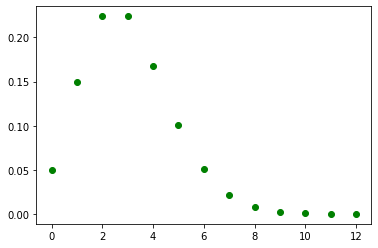

In [ ]:
from scipy import stats

X = distribution_samples[10_000]
display("X min", numpy.min(X), "X max", numpy.max(X))
k = sorted(set(X))
display("k", k)
Pk = stats.poisson.pmf(k, plam)
display("P min", numpy.min(Pk), "P max", numpy.max(Pk))

import matplotlib.pyplot as plt


plt.plot(k, Pk, 'go')

#### Muestras aleatorias.

Genere 5 muestra aleatoria con esa distribución, cada una de ellas con tamaño n=10, n=100, n=1000, n=5000, n =10000

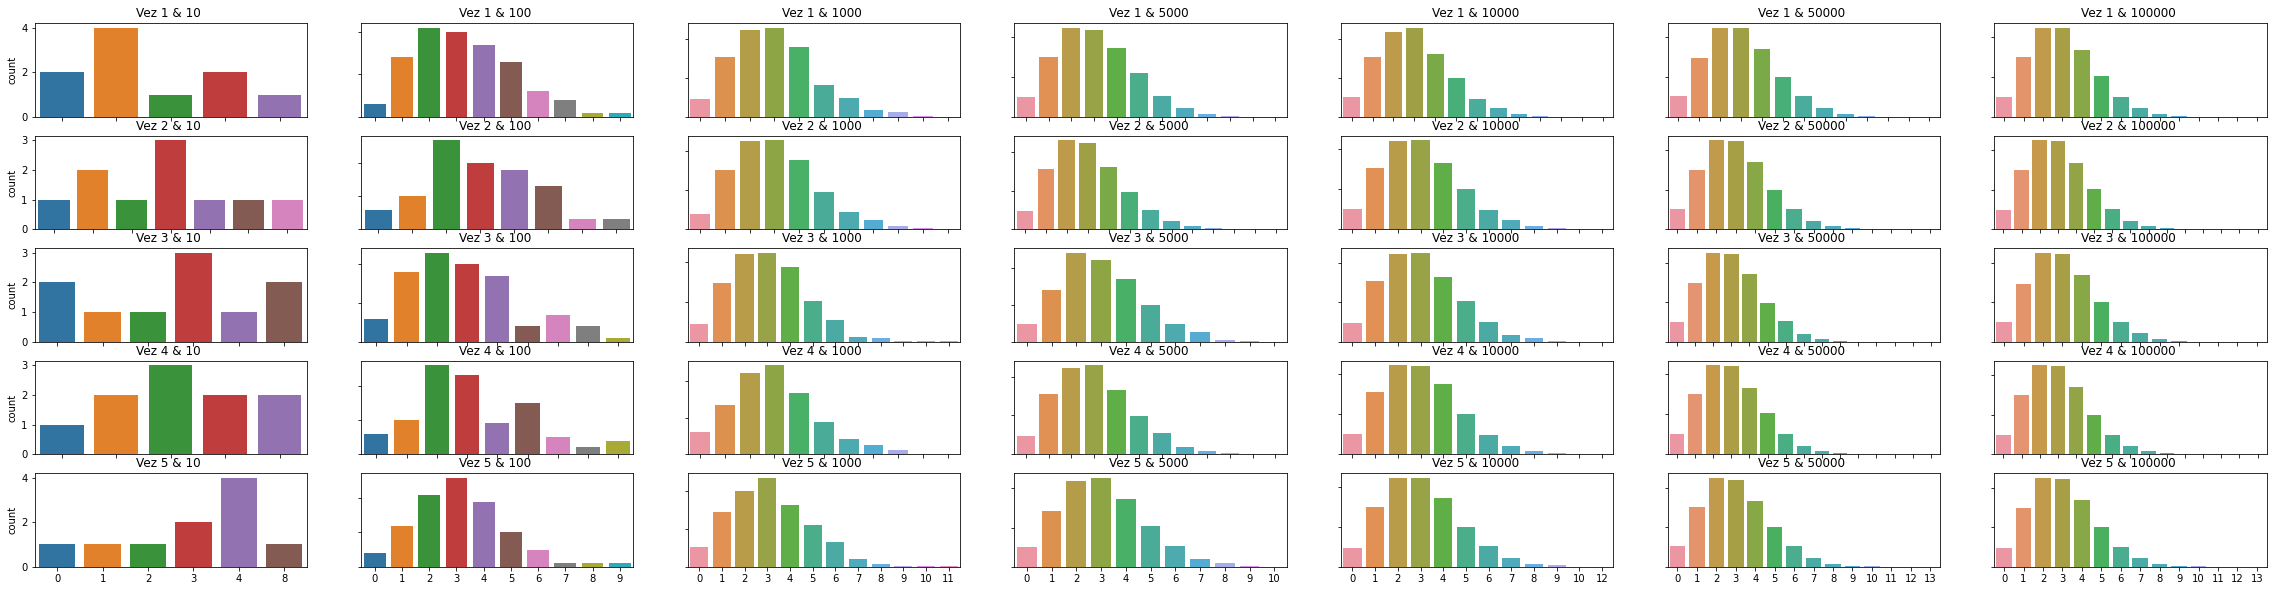

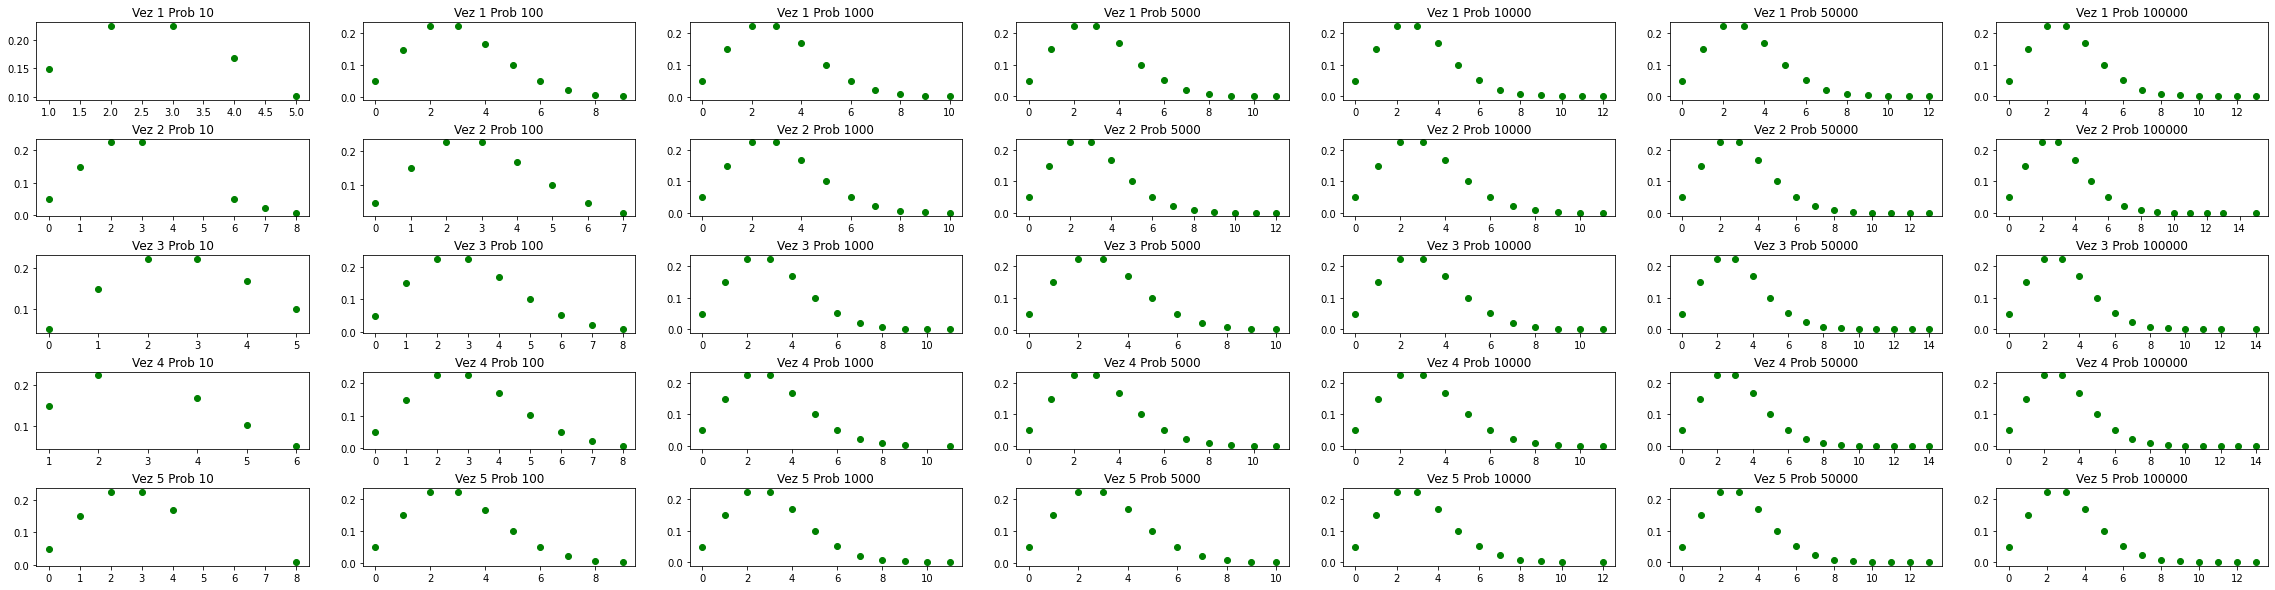

In [ ]:
import seaborn

times = 5

count_fig, count_ax = plt.subplots(times, len(network_request_samples(plam).keys()), sharex=False, sharey=False, figsize=(40, 10))
dist_fig, dist_ax = plt.subplots(times, len(network_request_samples(plam).keys()), sharex=False, sharey=False, figsize=(40, 10))

dist_fig.subplots_adjust(hspace=0.5)

for n in range(times):
  for i, nsample in enumerate(network_request_samples(plam).items()):
    count_ax[n, i].set_title(f"Vez {n + 1} & {nsample[0]} ")
    nk = sorted(set(nsample[1]))
    nPk = stats.poisson.pmf(nk, plam) 
    
    dist_ax[n, i].set_title(f"Vez { n + 1} Prob { nsample[0] }")
    dist_ax[n, i].plot(nk, nPk, 'go')
    seaborn.countplot(x=nsample[1], ax=count_ax[n, i])
    count_ax[n, i].label_outer()


###  Observaciones: 

Repitiendo el ejercicio se puede ver que la probialidad se mantiene estable, no importa el tamaño de la muestra siempre parece ser la misma.

# Teorema del limite central
* Genere 500 muestras de tamaño 200
* Grafique la distribución de al menos 3 muestras del punto 4 (punto 4?)
* Calcule la media de cada una de las 500 muestras  y grafique su distribución (distribución de los promedios de la muestra)
* Describa sus observaciones

In [ ]:
# 500 muestras de tamaño 200
size = 200
nsamples = 500

samples = [ numpy.random.random_sample(size) for _i in range(nsamples) ]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

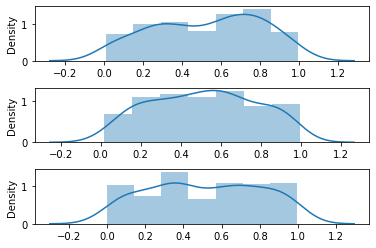

In [ ]:
# Grafica de la distribución de al menos 3 muestras

dist_3_fig, dist_3_ax = plt.subplots(3)

dist_3_fig.subplots_adjust(hspace=0.5)


seaborn.distplot(x=samples[0], ax=dist_3_ax[0])
seaborn.distplot(x=samples[400], ax=dist_3_ax[1])
seaborn.distplot(x=samples[150], ax=dist_3_ax[2])

In [ ]:
# Calculo de la media de cada una de las 500 muestras

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


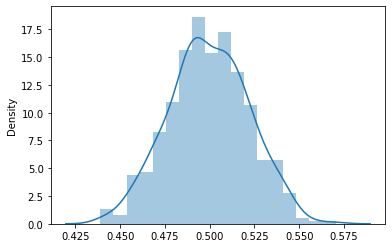

In [ ]:
# Grafica de la distribución de los promedios de las 500 muestras
samples_mean = (numpy.mean(i) for i in samples)

seaborn.distplot(sample_means)

Observaciones:

La suma de las medias de las variables generadas de manera aleatoria parece representar que sigue una distribucion gaussiana.

# Intervalos de confianza
* Calclule el intervalo de confianza de la décima muestra para un nivel de confianza de 95%
* Genera una muestra más pero ahora de tamaño 400
* Calcule el intervalo de confianza para un nivel de confianza de 95%
* Explique sus observaciones

In [ ]:
#intarválo de convianza
def norm_confidence_interval(samples, alpha=0.95):
  mean = numpy.mean(samples)
  std = numpy.std(samples)
  return stats.norm.interval(alpha, loc=mean, scale=std)


display(norm_confidence_interval(samples[9], 0.95))
display(norm_confidence_interval(samples[10], 0.95))
display(norm_confidence_interval(samples[-1], 0.95))

(-0.03484990516321118, 1.1135862567762889)

(-0.0922516996259849, 1.0275994525381345)

(-0.06197961410577135, 1.0087830575077426)

In [ ]:
# generación de muestra de tamaño 400 y calculo del interválo de confianza

cinterval_sample = numpy.random.random_sample(400)

display(norm_confidence_interval(cinterval_sample, 0.95))

(-0.09882614083582086, 1.0762799356662085)

Observaciones: 

- El ancho de los intervalos se mantinen a pesar del tamaño de la muestra.

# Aplicación de los conceptos  

* Explique por qué los residuos de una regresión lineal deberían ser normales.

Toda la inferencia sobre los coeficientes & el ajuste de la regresion lineal se hace asumiendo una distribucion normal de los errores. 

Si no son normales no se puede asegurar que los elementos de la regresion lineal sigan las distribucion esperadas.


* Explique que significa el p-value de un coeficiente en una regresión, cuál es la hipótesis nula que se pone a prueba y cuándo se rechaza o acepta la hipótesis.

El p-value es el nivel de significacion del coeficiente, por tanto la importancia de ese "feature" que acompaña dicho coeficiente en la regresion. Si es significativa o no. 

Hipotesis nula 

$$H_0 : \beta_i = 0 $$ 

Cuando se rechaza o acepta la hipotesis? Si p-value es menor que $\alpha$ donde $\alpha$ es el nivel de significacia, entonces se rechaza la hipotesis nula. Si el p-value es mayor que $\alpha$ entonces no se rechaza la hipotesis nula.

* ¿Que significa el intervalo de confianza de un coeficiente obenido de una regresión lineal?

que el cofieciente tomara siempre los valores que se encuantran dentro de este intervalo.

Si se toman muestras repetidas del mismo tamaño a los mismo valores del conjunto de datos & se forman intervalos de por ejemplo 95% entonces para cada uno de los coeficientes, el 95% de estos intervalos contendra el verdadero valor del coeficiente. 

* Explique las ventajas de utilizar el algoritmo Naive-Bayes para la clasificación de textos como spam y no spam, y las hipótesis en las que se basa.

El algoritmo "Naive-Bayes" asume que cada una de las features son independientes & al combinar esta idea con tecnicas como "Bag of words"  por que en esta tecnica no importa el orden de las palabras por ejemplo. 

Con "Naive-Bayes" no es necesario hacer demasiado pre-procesamiento a un dataset generado como "Bag-of-words" que no capturan el contexto.

"Naive Bayes" hace supuestos que hace que sea un model rapido y facil de implementar. (https://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf).


"Naive Bayes" asume una independecia condicional entre cada par de "features" (X) dado el valor de la variable de clase (y).